In [7]:
print('Hello')

Hello


In [8]:
import numpy as np
import pandas as pd

In [9]:
import sklearn
print(sklearn.__version__)

1.7.2


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0]]))
print(clf.score(X,y))

[1]
0.946


In [11]:
df = pd.read_csv("adv_1_1_dataset.csv")
print(len(df['id.orig_h']))
df_2 = pd.read_csv("adv_7_1_dataset.csv")
print(len(df_2['id.orig_h']))
df_3 = pd.read_csv("adv_33_1_dataset.csv")
print(len(df_3['id.orig_h']))

df_concat = pd.concat([df,df_2, df_3])
print(len(df_concat['id.orig_h']))

sampled_df = df_concat.groupby('label').head(min(df_concat['label'].value_counts()))

labels = sampled_df['label']
sampled_df = sampled_df.drop(['label'], axis=1)
print(labels.unique())
print(len(labels))
print(labels.value_counts())


1008748
11454714
54454591
66918053
['Part of Horizontal Scan' 'Benign' 'C&C' 'okiru' 'DDoS']
55320
label
Part of Horizontal Scan    11064
Benign                     11064
C&C                        11064
okiru                      11064
DDoS                       11064
Name: count, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampled_df, labels, test_size=0.20, random_state=42)

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print("Accuract: " + str(clf.score(X_test, y_test)))
print("Precision: " + str())

Accuract: 1.0
Precision: 


In [14]:
import sklearn.metrics as metrics

for n in range(10,80, 10):
    print("Number of estimators: " + str(n))
    clf = RandomForestClassifier(n_estimators=n, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print("Accuract: " + str(metrics.accuracy_score(predictions, y_test)))
    print("Precision: " + str(metrics.precision_score(predictions, y_test, average='macro')))
    print("Recall: " + str(metrics.recall_score(predictions, y_test, average='macro')))
    print("F1 Score: " + str(metrics.f1_score(predictions, y_test, average='macro')))




Number of estimators: 10
Accuract: 0.9762292118582792
Precision: 0.975979926591989
Recall: 0.9783071409263879
F1 Score: 0.9762204964443558
Number of estimators: 20
Accuract: 0.9710773680404917
Precision: 0.9707529664819476
Recall: 0.9731489159946267
F1 Score: 0.9706567640992585
Number of estimators: 30
Accuract: 0.9709869848156182
Precision: 0.9706612654273854
Recall: 0.9730607823117658
F1 Score: 0.9705590249080839
Number of estimators: 40
Accuract: 0.970354302241504
Precision: 0.9700193580454506
Recall: 0.9724396104788899
F1 Score: 0.96988087090185
Number of estimators: 50
Accuract: 0.9659255242227043
Precision: 0.9655260063719064
Recall: 0.9681614918790448
F1 Score: 0.9650883993270207
Number of estimators: 60
Accuract: 0.970354302241504
Precision: 0.9700193580454506
Recall: 0.9725099077890459
F1 Score: 0.9699291310462034
Number of estimators: 70
Accuract: 0.9659255242227043
Precision: 0.9655260063719064
Recall: 0.9682162654772215
F1 Score: 0.9650747687160404


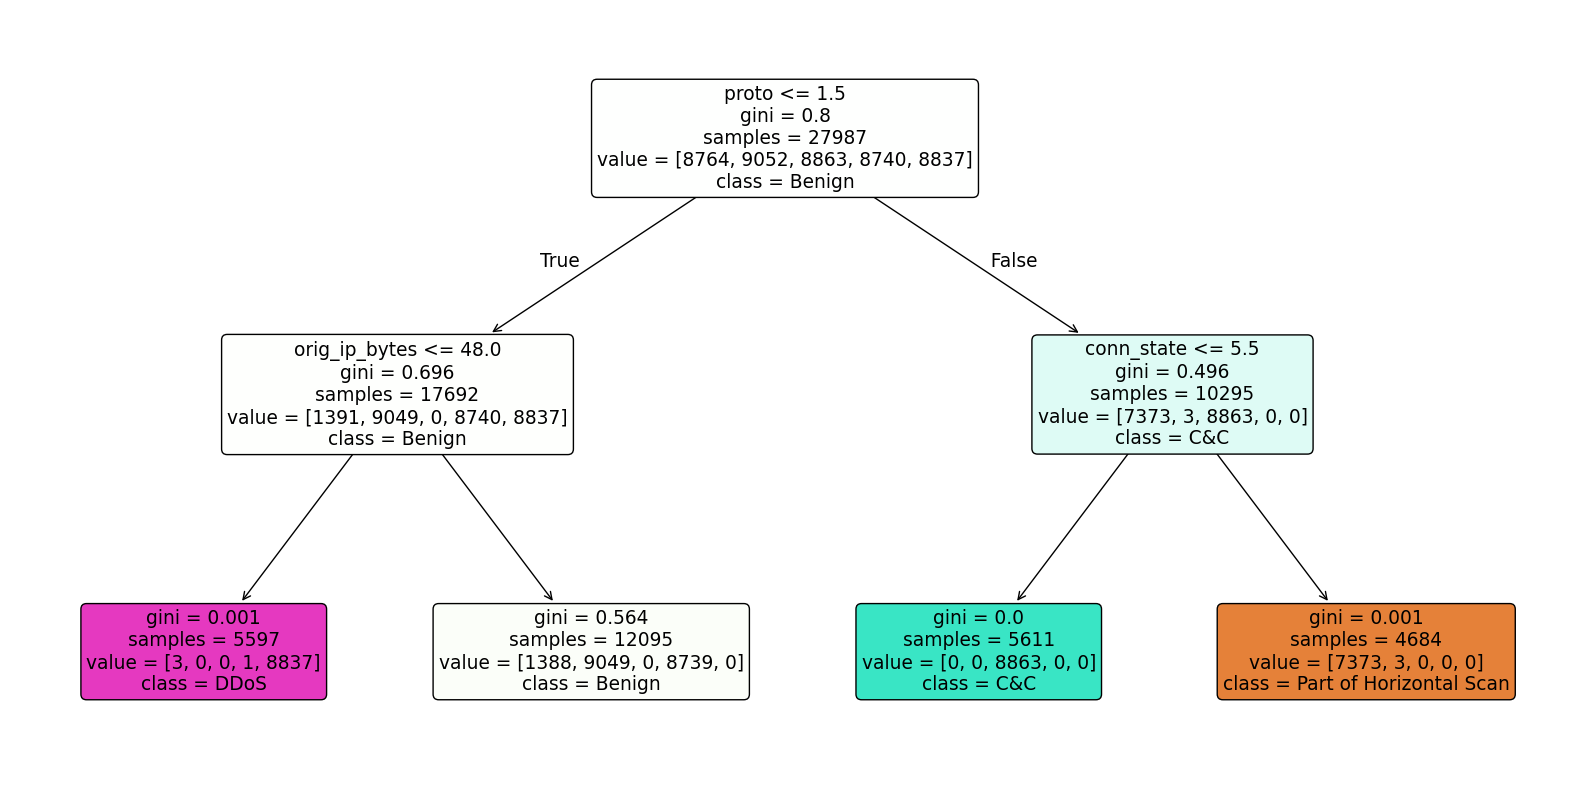

'tree.png'

In [15]:
from sklearn import tree
import graphviz

tree_test = clf.estimators_[0]

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_test,
            feature_names=df.columns,
            class_names=labels.unique(),
            filled=True, rounded=True)
plt.show()

dot_file=tree.export_graphviz(tree_test, out_file=None, feature_names=sampled_df.columns, class_names=labels.unique(), label="all")

graphiz_tree = graphviz.Source(dot_file)
graphiz_tree.render("tree",format="png",  cleanup=True)